In [1]:
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.3 (python 3.8.8) on 2021-08-19 12:59.


In [2]:
## change matplotlib settings for beautiful visualization
scv.settings.verbosity = 3 # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True # set max width size for presenter view
scv.set_figure_params('scvelo') # for beautified visualization

In [7]:
adata = scv.read("Data/velocyto/Chromium033.loom", cache = True)
X_umap = scv.load('Data/loupe_input/Chromium033_PC10_res0.5.for_scvelo.csv', index_col = 0)
adata.obsm['X_umap'] = X_umap.values

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


ValueError: Value passed for key 'X_umap' is of incorrect shape. Values of obsm must match dimensions (0,) of parent. Value had shape (5676, 3) while it should have had (7592,).

In [4]:
#adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 7592 × 32285
    obs: 'Clusters', '_X', '_Y'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

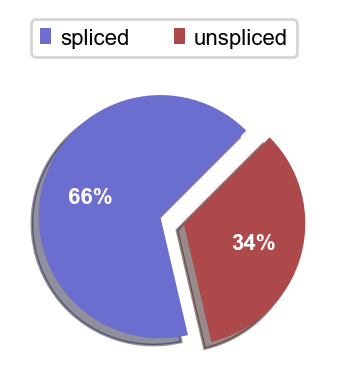

In [13]:
scv.pl.proportions(adata)

In [14]:
## basic preprocessing and compute first- and second- order moments for velocity estimation.
scv.pp.filter_and_normalize(adata, min_shared_counts = 20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes = 2000)
scv.pp.log1p(adata)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Filtered out 23336 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Logarithmized X.
Extracted 2000 highly variable genes.


In [24]:
#pip install numba==0.50.1 --no-cache-dir

     |████████████████████████████████| 2.1 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 17.3 MB 10.0 MB/s eta 0:00:01
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.36.0
    Uninstalling llvmlite-0.36.0:
      Successfully uninstalled llvmlite-0.36.0
  Attempting uninstall: numba
    Found existing installation: numba 0.53.1
    Uninstalling numba-0.53.1:
      Successfully uninstalled numba-0.53.1
Note: you may need to restart the kernel to use updated packages.


In [15]:
scv.pp.filter_and_normalize(adata, min_shared_counts = 20, n_top_genes = 2000)
scv.pp.moments(adata, n_pcs = 10, n_neighbors = 30)

Filtered out 81 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [16]:
## estimation of velocities.
scv.tl.velocity(adata, mode='stochastic')
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:15) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [23]:
import scanpy as sc
scv.tl.umap(adata)

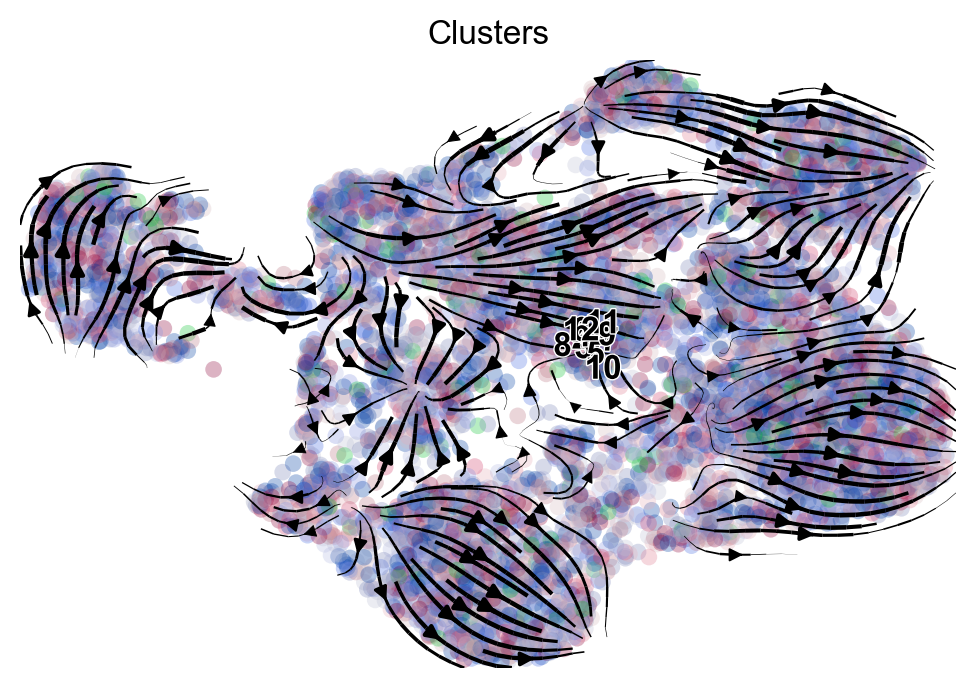

In [26]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color = 'Clusters')

In [11]:
## Visualization
scv.pl.velocity_embedding(adata, basis='umap', **params)
scv.pl.velocity_embedding_grid(adata, basis='umap', **params)
scv.pl.velocity_embedding_stream(adata, basis='umap', **params)

In [22]:
import numba

In [23]:
numba.__version__

'0.53.1'